# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import re
from nltk import download
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import  WordNetLemmatizer

In [3]:
download('stopwords')
download('wordnet')
download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
data = pd.read_parquet('/content/drive/MyDrive/Amazon Reviews/AMAZON_FASHION_v3.parquet')

In [5]:
df = data.copy()
df.head()

,overall,reviewTime,reviewText,summary,reviewLength
0,5,"10 20, 2014",Exactly what I needed.,perfect replacements!!,4
1,2,"09 28, 2014","I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",48
2,2,"08 24, 2014",too tiny an opening,Two Stars,4
3,5,"07 19, 2014",Exactly what I wanted.,Five Stars,4
4,4,"05 31, 2014",These little plastic backs work great. No mor...,Works great!,28


# NLP

In [6]:
### convert into lower case
df['reviewText'] = df.reviewText.str.lower()
df.head().reviewText

0                               exactly what i needed.
1    i agree with the other review, the opening is ...
2                                  too tiny an opening
3                               exactly what i wanted.
4    these little plastic backs work great.  no mor...
Name: reviewText, dtype: object

In [7]:
def clean(df):
    ### removes punctuation
    res = df.reviewText.str.replace('[^\w\s]', '', regex=True)

    ### removes non-character
    res = res.str.replace('\d+', '', regex=True)


    ### remove emojis
    res = res.str.replace("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", '', regex=True, flags=re.UNICODE)

    return res

In [8]:
print('\U0001F600')

😀


In [9]:
clean(df)

0                                     exactly what i needed
1         i agree with the other review the opening is t...
2                                       too tiny an opening
3                                     exactly what i wanted
4         these little plastic backs work great  no more...
                                ...                        
823060    i absolutely love this dress  its sexy and com...
823061    im  lbs im on the tall side i wear a large and...
823062                            too big in the chest area
823063                   too clear in the back needs lining
823064    ordered and was slightly small worked with the...
Name: reviewText, Length: 823065, dtype: object

In [10]:
df['reviewText'] = clean(df)

In [11]:
text = " ".join(review for review in df.reviewText)
cloud = WordCloud()

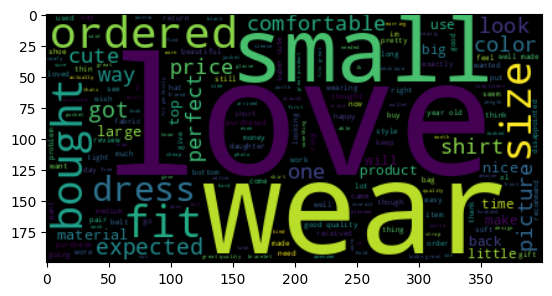

In [12]:
plt.imshow(cloud.generate(text), interpolation='bilinear')
plt.show()

In [13]:
### stopwords

stopwordsList = set(stopwords.words('english'))
stopwordsList.update(
    [
        'br', 'href', 'http', 'www',  "ordered", 'bought', 'dress', 'order', 'color', 'shirt', 'one', 'tshirt', 'product',
        'item', 'would', 'could', 'make', 'fabric', 'jeans', 'sweater', 'jacket', 'pant', 'shoe', 'trouser',
        'clothing', 'apparel', 'fashion''style', 'brand', 'collection', 'designer','season','trend','outfit',
        'accessory','runway','model','fabric','garment','store','shop','boutique','retail','customer','color'
        'size','material','design','look','dress','skirt','blouse','coat', 'accessory','jewelry','handbag','hat','scarf','sunglasses',
        'watch','makeup','hair','model','photography','influencer','marketing','promotion','sale','discount','price', 'wear', 'picture',
        'received', 'money', 'actually', 'almost', 'also', 'another',
       'arm', 'around', 'arrived', 'baby', 'back','bag', 'band', 'belt', 'bit', 'black', 'boot', 'bottom', 'came',
       'cant', 'come', 'costume', 'cover', 'cut', 'daughter', 'day', 'different', 'easy', 'enough', 'er', 'even',  'extra', 'find'
       'first', 'foot', 'gave', 'get', 'gift', 'give', 'glass',
       'go', 'going', 'got', 'head', 'however', 'husband', 'im', 'ive', 'keep', 'know', 'made', 'make', 'many', 'month',
       'overall', 'pair', 'pant', 'part', 'piece',
       'pocket', 'purchase', 'purchased', 'purse','put', 'review', 'ring', 'run', 'said', 'say', 'see', 'seems',
       'shipping', 'shoe', 'short', 'side', 'since', 'sleeve', 'sock', 'something', 'son', 'stay', 'still', 'strap', 'sun',
       'support', 'theyre', 'thing', 'time', 'took', 'tried', 'true', 'two', 'use', 'usually', 'wash',
       'way', 'week', 'white', 'without', 'woman', 'worn', 'xl', 'year', 'samll', 'bought', 'ordered', 'product', 'item', 'meny'
    ]
)

In [14]:
### NLP
def nlprocess(df):
    lemmatizer = WordNetLemmatizer()
    # toikenize and stopwords removal
    processed = [
           ' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(review) if token.casefold() not in stopwordsList]) for review in df.reviewText
        ]
    return processed

In [ ]:
out = nlprocess(df)
out

In [30]:
df['reviewText'] = out

### Binning

In [32]:
df

,overall,reviewTime,reviewText,summary,reviewLength,sentiment
0,5,"10 20, 2014",exactly needed,perfect replacements!!,4,0
1,2,"09 28, 2014",agree opening small bent hook expensive earrin...,"I agree with the other review, the opening is ...",48,1
2,2,"08 24, 2014",tiny opening,Two Stars,4,1
3,5,"07 19, 2014",exactly wanted,Five Stars,4,0
4,4,"05 31, 2014",little plastic back work great loosing hook ea...,Works great!,28,0
...,...,...,...,...,...,...
823060,5,"02 21, 2017",absolutely love sexy comfortable split much se...,I absolutely love this dress,48,0
823061,5,"11 25, 2016",lb tall large large comfortable amount room sn...,I wear a large and ordered a large and it stil...,37,0
823062,3,"11 10, 2016",big chest area,Three Stars,6,0
823063,3,"11 10, 2016",clear need lining,Three Stars,7,0


In [33]:
### to set 0 as Positive reviw
df['sentiment'] = 0
df.sentiment

0         0
1         0
2         0
3         0
4         0
         ..
823060    0
823061    0
823062    0
823063    0
823064    0
Name: sentiment, Length: 823065, dtype: int64

In [34]:
### setting negetive reviews as 1
df.loc[df['overall'] < 3,'sentiment'] = 1

In [35]:
df.head().T

,0,1,2,3,4
overall,5,2,2,5,4
reviewTime,"10 20, 2014","09 28, 2014","08 24, 2014","07 19, 2014","05 31, 2014"
reviewText,exactly needed,agree opening small bent hook expensive earrin...,tiny opening,exactly wanted,little plastic back work great loosing hook ea...
summary,perfect replacements!!,"I agree with the other review, the opening is ...",Two Stars,Five Stars,Works great!
reviewLength,4,48,4,4,28
sentiment,0,1,1,0,0


### WordCloud Aanalysis

In [36]:
neg = df[df['sentiment'] == 1]
pos = df[df['sentiment'] == 0]

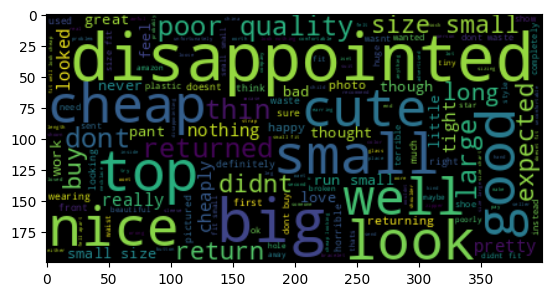

In [37]:

text = " ".join(review for review in neg.reviewText)
cloud = WordCloud()
plt.imshow(cloud.generate(text), interpolation='bilinear')
plt.show()

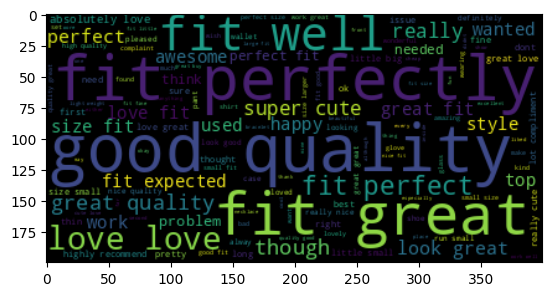

In [38]:

text = " ".join(review for review in pos.reviewText)
cloud = WordCloud()
plt.imshow(cloud.generate(text), interpolation='bilinear')
plt.show()

### Save

In [39]:
df.to_parquet('/content/drive/MyDrive/Amazon Reviews/AMAZON_FASHION_v4.parquet')